In [1]:
from coffea import processor, util
from coffea.nanoevents import NanoAODSchema
from boostedhiggs import bbwwprocessor

/Users/cmantill/CMS/HWW/HH/boostedhiggs/boostedhiggs/data


/Users/cmantill/miniconda3/envs/hww/lib/python3.7/site-packages/coffea/lookup_tools/txt_converters.py:182: UserWarning: binning for file for Summer16_07Aug2017_V11_MC_L2Relative_AK4PFchs is malformed in variable JetPt
  % (name, layout[i + offset_name])
/Users/cmantill/miniconda3/envs/hww/lib/python3.7/site-packages/coffea/lookup_tools/txt_converters.py:280: UserWarning: JERSF file is in the new format with split-out systematic, only parsing totals!!!
  "JERSF file is in the new format with split-out systematic, only parsing totals!!!"


In [2]:
files = {
    'BG_hhTohVVhbb_2500': [
        '/Users/cmantill/CMS/HWW/HH/boostedhiggs/binder/data/BulkGravTohhTohVVhbb_narrow_M-2500_TuneCP5_13TeV-madgraph-pythia8_nano_mc2017_1.root',
    ]
}

In [3]:
p = bbwwprocessor.HHbbWW(year='2017')
exe_config = {
    'flatten': True,
    'workers': 4,
    'savemetrics': True,
    'compression': 0,
    'nano': True,
}

NanoAODSchema.mixins["FatJetLS"] = "PtEtaPhiMLorentzVector"

output = processor.run_uproot_job(files,"Events",p,processor.iterative_executor,{"schema": NanoAODSchema})

131000
[1.16e+03, 1.15e+03, 1.23e+03, 1.33e+03, 508, ... 764, 972, 1.38e+03, 687, 1.21e+03]
131000
[None, None, None, None, None, None, None, ... None, None, None, 907, 705, 284, None]


/Users/cmantill/miniconda3/envs/hww/lib/python3.7/site-packages/awkward/_connect/_numpy.py:151: RuntimeWarning: invalid value encountered in sqrt
  *[nplike.asarray(x) for x in inputs], **kwargs


In [4]:
print(output['cutflow_SR_e'])
print(output['cutflow_SR_mu'])

defaultdict_accumulator(..., {'BG_hhTohVVhbb_2500': defaultdict_accumulator(<class 'float'>, {'none': 138045.03904514838, 'trigger_e': 138045.03904514838, 'met_filters': 135697.18024553428, 'nleptons_e': 9182.07223711041, 'hbb_btag': 6340.654326958903, 'hbb_vetobtagaway': 644.9774200650173, 'hww_tau21_LP': 565.2614999870113})})
defaultdict_accumulator(..., {'BG_hhTohVVhbb_2500': defaultdict_accumulator(<class 'float'>, {'none': 138045.03904514838, 'trigger_mu': 138045.03904514838, 'met_filters': 135697.18024553428, 'nleptons_mu': 19269.36877514295, 'hbb_btag': 13012.492134979348, 'hbb_vetobtagaway': 1173.494505334735, 'hww_tau21_LP': 1071.3444448371874})})


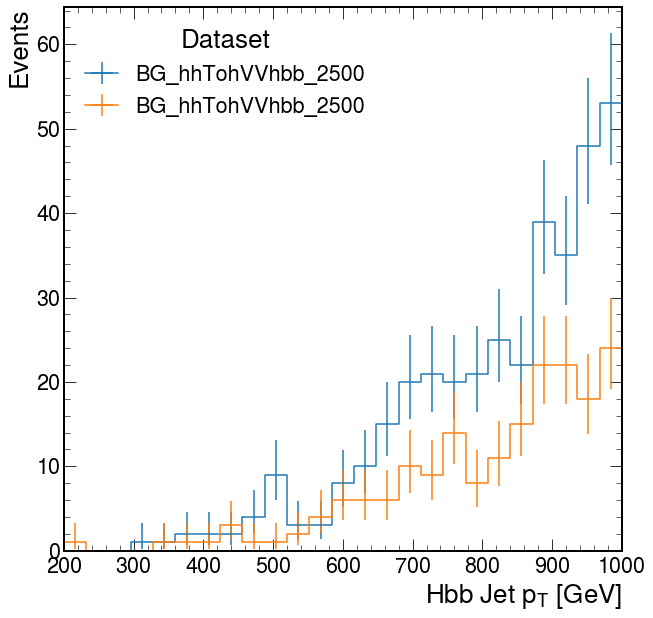

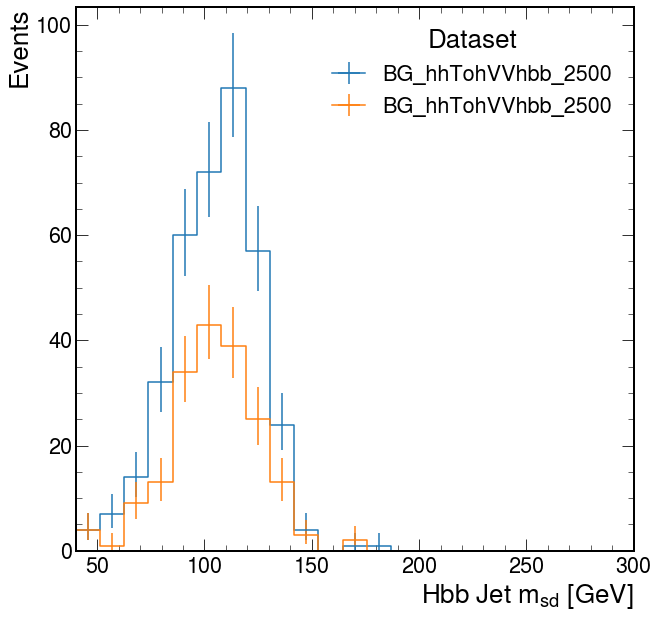

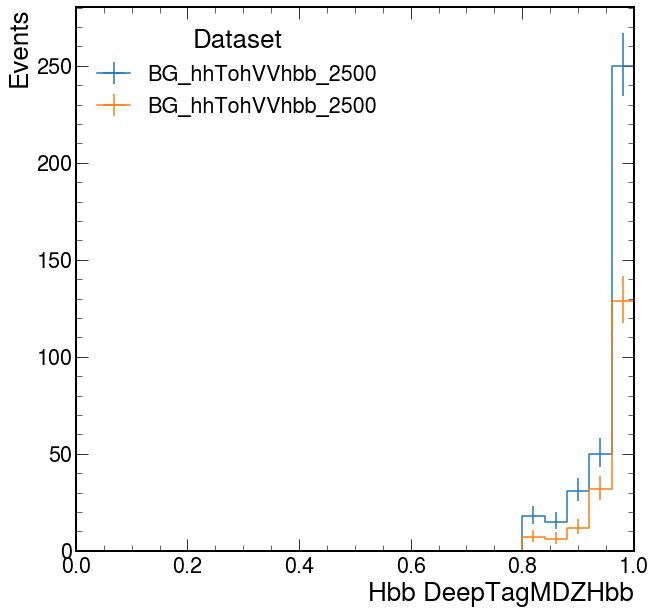

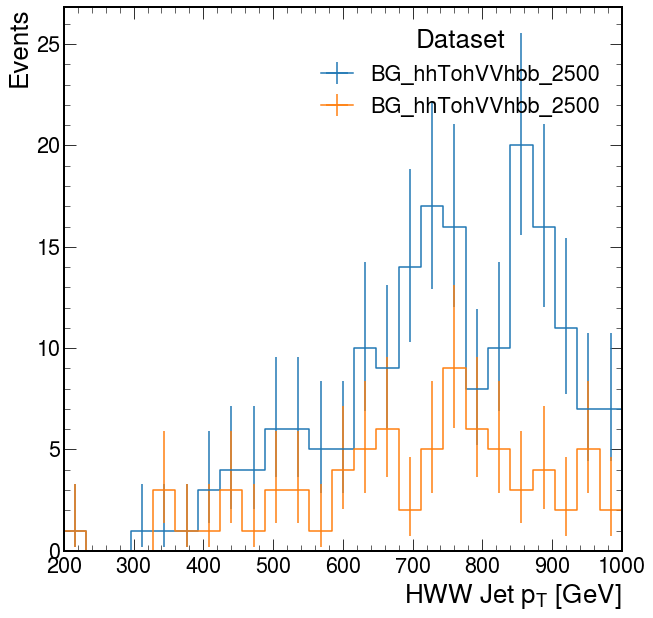

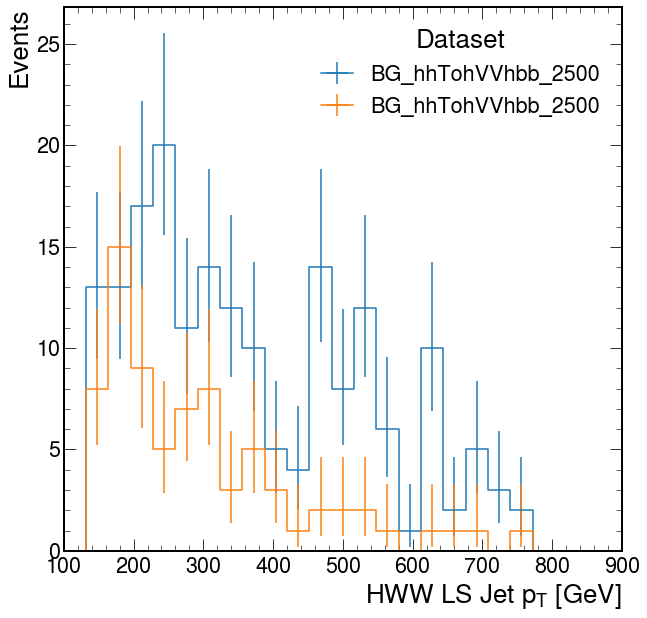

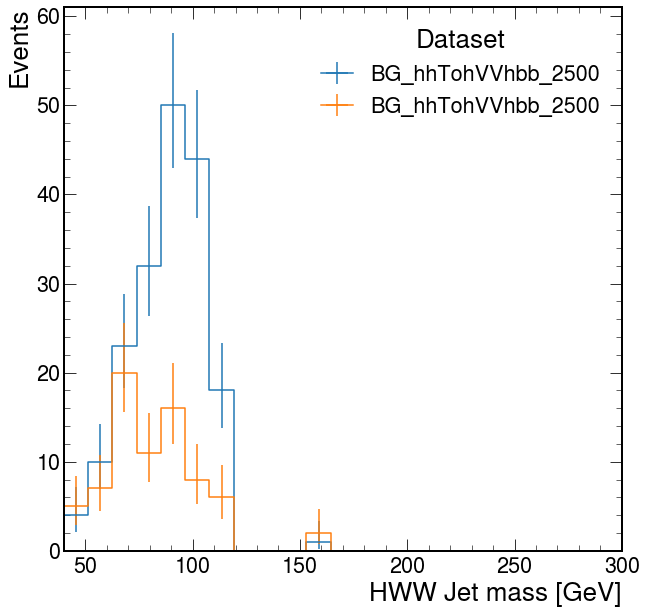

<Figure size 720x720 with 0 Axes>

In [7]:
from coffea import hist
%matplotlib inline
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)

h = output['hbb_kinematics']
hist.plot1d(h.sum('hbb_msd','hbb_deepak8').integrate('channel','mu'), overlay='dataset')
hist.plot1d(h.sum('hbb_msd','hbb_deepak8').integrate('channel','e'), overlay='dataset')
plt.show()
plt.clf()
hist.plot1d(h.sum('hbb_pt','hbb_deepak8').integrate('channel','mu'), overlay='dataset')
hist.plot1d(h.sum('hbb_pt','hbb_deepak8').integrate('channel','e'), overlay='dataset')
plt.show()
plt.clf()
hist.plot1d(h.sum('hbb_pt','hbb_msd').integrate('channel','mu'), overlay='dataset')
hist.plot1d(h.sum('hbb_pt','hbb_msd').integrate('channel','e'), overlay='dataset')
plt.show()
plt.clf()

h = output['hww_kinematics']
hist.plot1d(h.sum('hwwls_pt','hww_mass').integrate('channel','mu'), overlay='dataset')
hist.plot1d(h.sum('hwwls_pt','hww_mass').integrate('channel','e'), overlay='dataset')
plt.show()
plt.clf()
hist.plot1d(h.sum('hww_mass','hww_pt').integrate('channel','mu'), overlay='dataset')
hist.plot1d(h.sum('hww_mass','hww_pt').integrate('channel','e'), overlay='dataset')
plt.show()
plt.clf()
hist.plot1d(h.sum('hwwls_pt','hww_pt').integrate('channel','mu'), overlay='dataset')
hist.plot1d(h.sum('hwwls_pt','hww_pt').integrate('channel','e'), overlay='dataset')
plt.show()
plt.clf()

In [6]:
from coffea.util import save
save(output,'hists_hww_local.coffea')